In [44]:
import pandas as pd
import seaborn as sns
from sklearn.svm                      import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process         import GaussianProcessClassifier
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.ensemble                 import ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.ensemble                 import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics                  import f1_score, accuracy_score, precision_score , recall_score, roc_auc_score, log_loss
from sklearn.metrics                  import confusion_matrix, classification_report
from sklearn.decomposition            import IncrementalPCA
from sklearn.pipeline                 import Pipeline
from sklearn.linear_model             import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
df = pd.read_csv('parkinsons.csv')

In [46]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [47]:
df.shape

(195, 24)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [49]:
# Verificando se ha valores ausentes
df.apply(pd.isnull).sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [50]:
df.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [51]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [52]:
def drop_outliers(df, field_name):
    # Calcular os percentis 25 e 75
    q1 = np.percentile(df[field_name], 25)
    q3 = np.percentile(df[field_name], 75)
    
    # Calcular a distância interquartil (IQR)
    iqr = q3 - q1
    
    # Definir os limites superior e inferior para identificar outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remover outliers
    df.drop(df[(df[field_name] < lower_bound) | (df[field_name] > upper_bound)].index, inplace=True)

In [53]:
numerico = [x for x in df.columns if df[x].dtypes!='O']
numerico

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [87]:
import matplotlib.pyplot as plt
from scipy import stats

def diagnostic_plots(df, variable):
    # Define a figura do gráfico
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    
    # Histograma
    sns.histplot(df[variable], bins=30, ax=axes[0])
    axes[0].set_title('Histograma')
    
    # Q-Q plot
    stats.probplot(df[variable], dist='norm', plot=axes[1])
    axes[1].set_ylabel('Variáveis quantiles')
    
    # Box plot
    sns.boxplot(y=df[variable], ax=axes[2])
    axes[2].set_title('Boxplot')
    
    plt.tight_layout()
    plt.show()

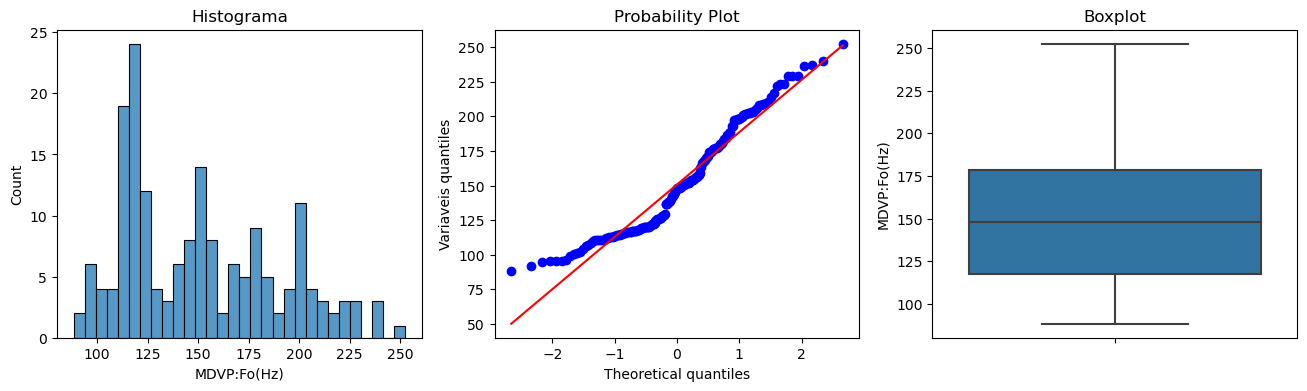

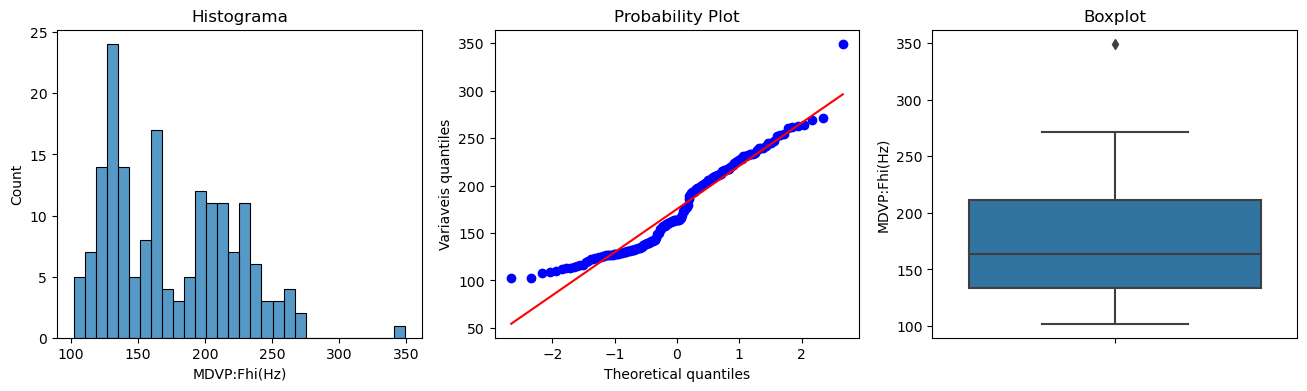

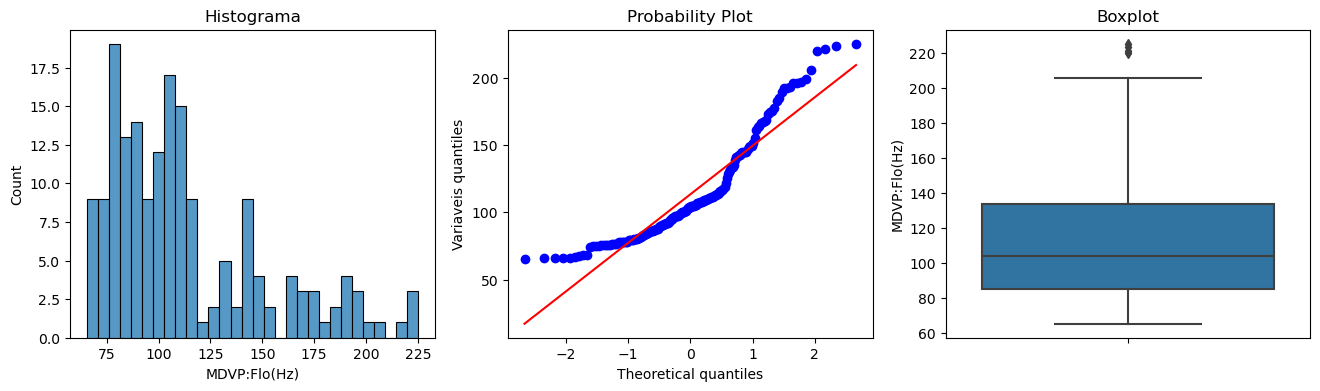

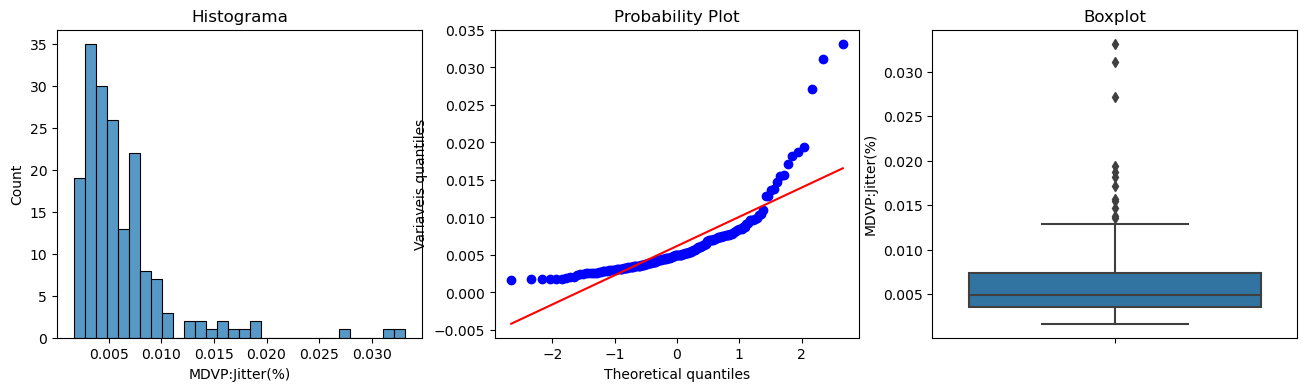

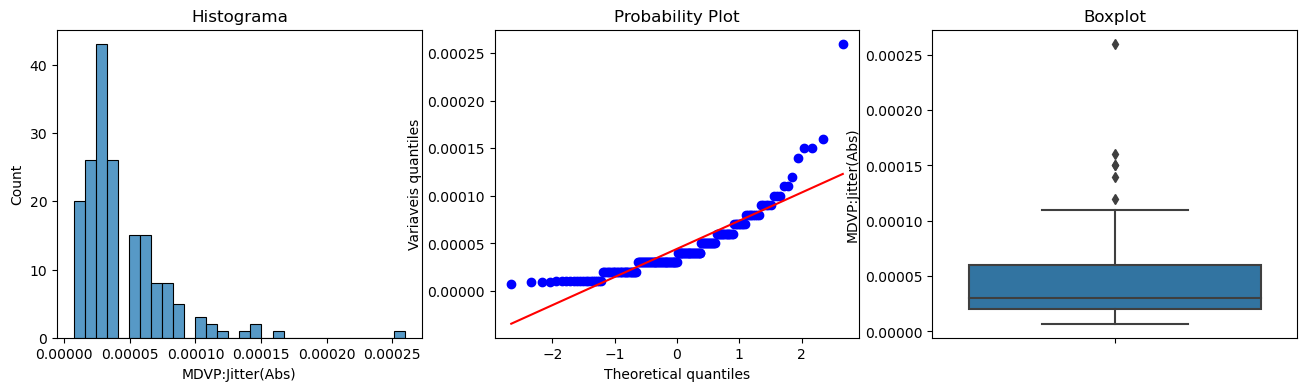

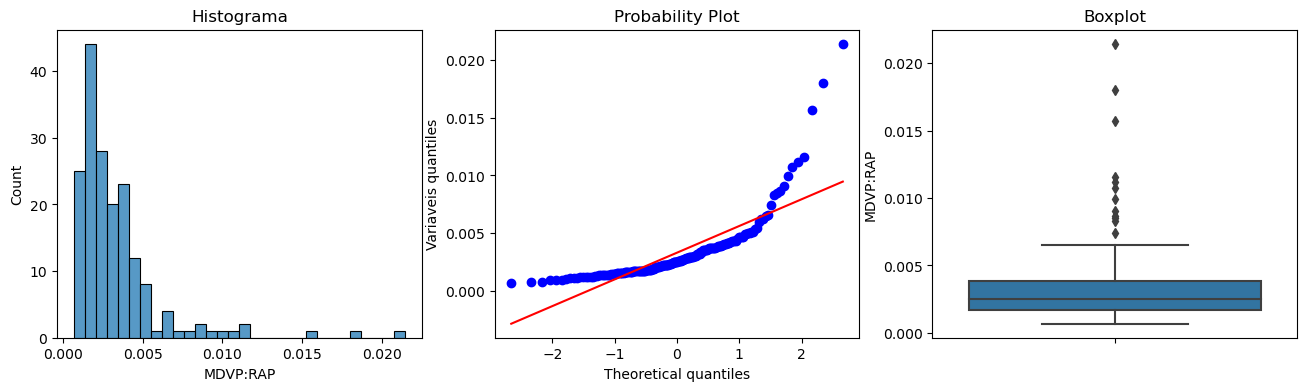

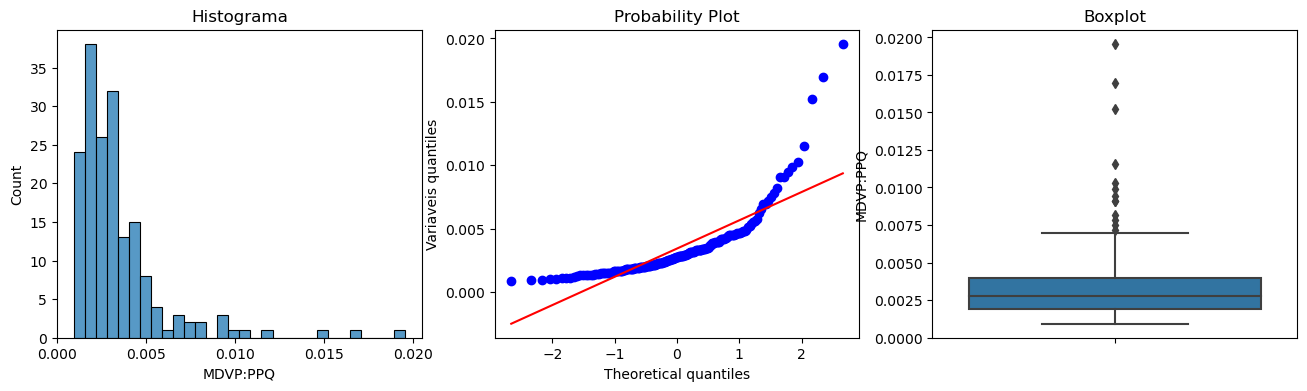

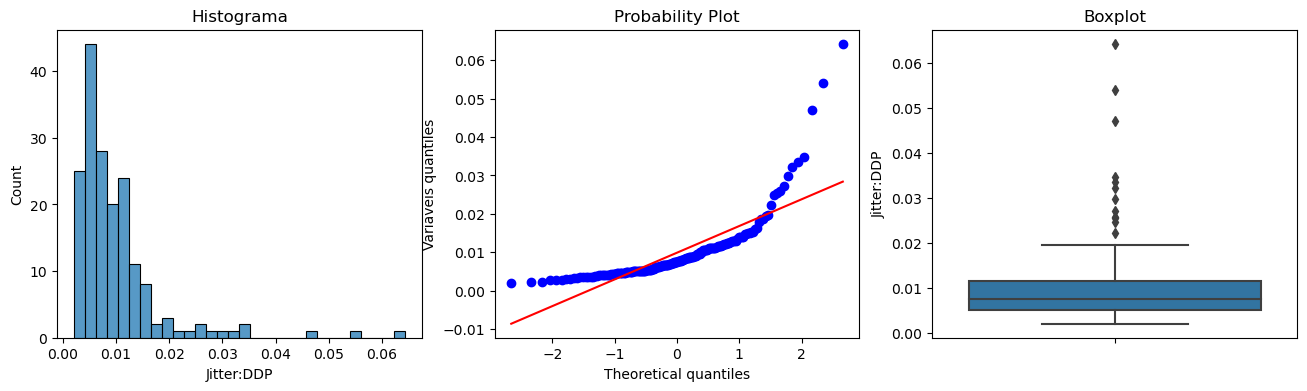

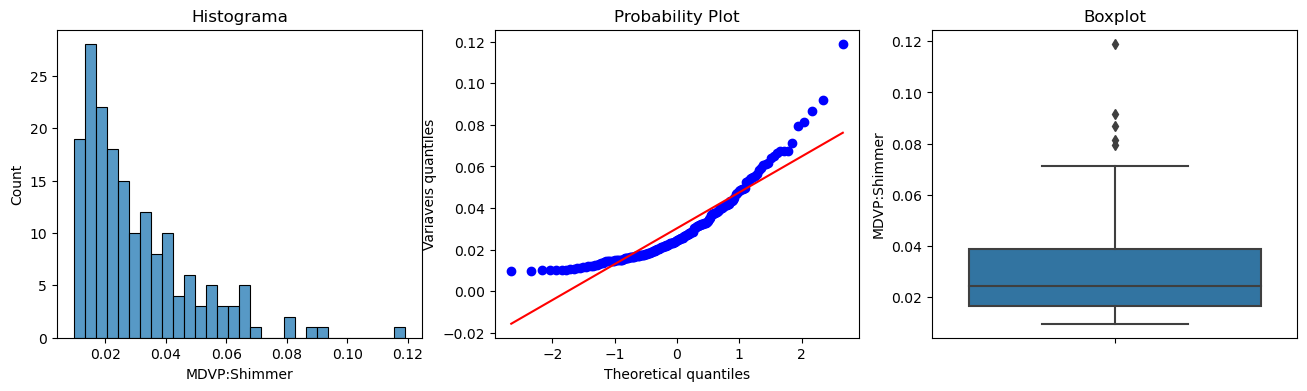

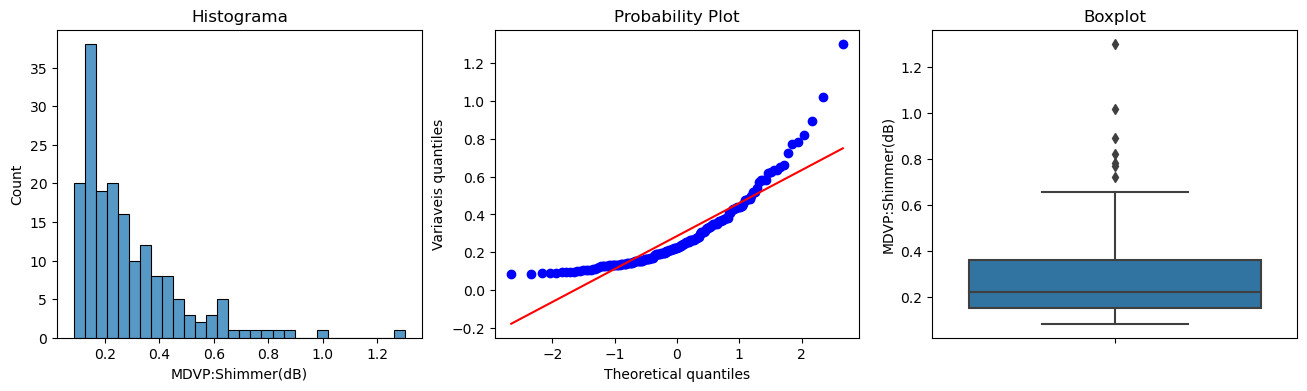

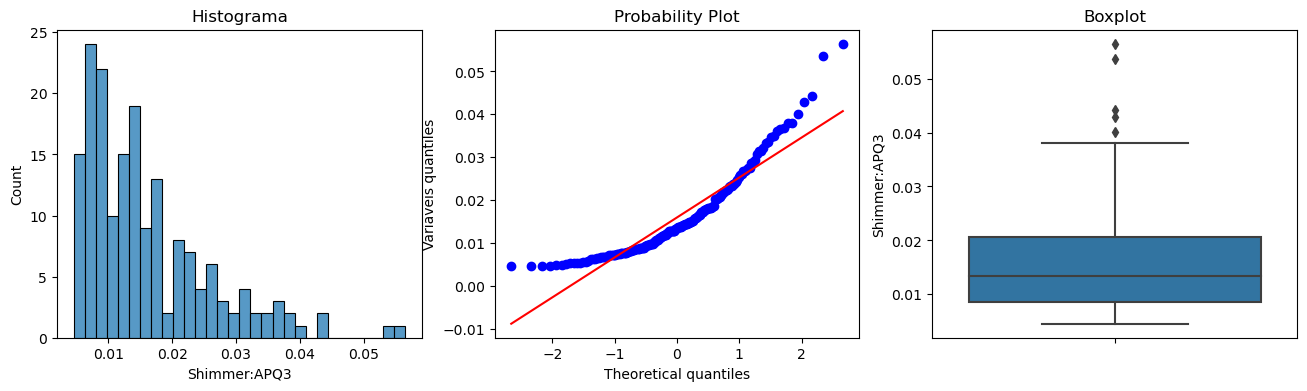

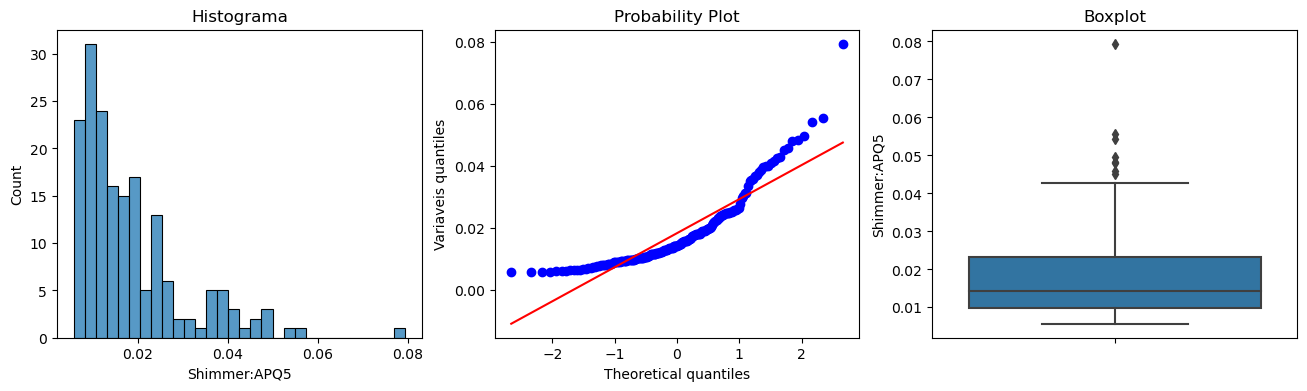

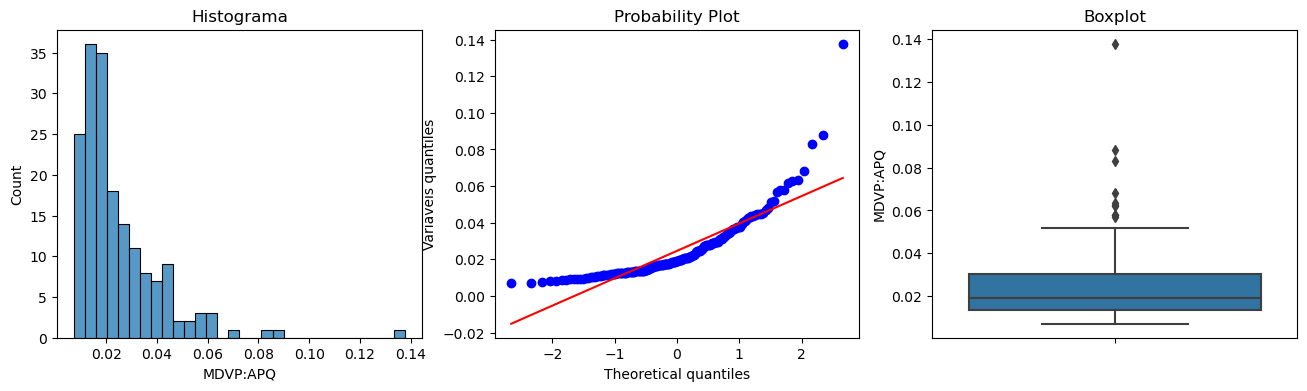

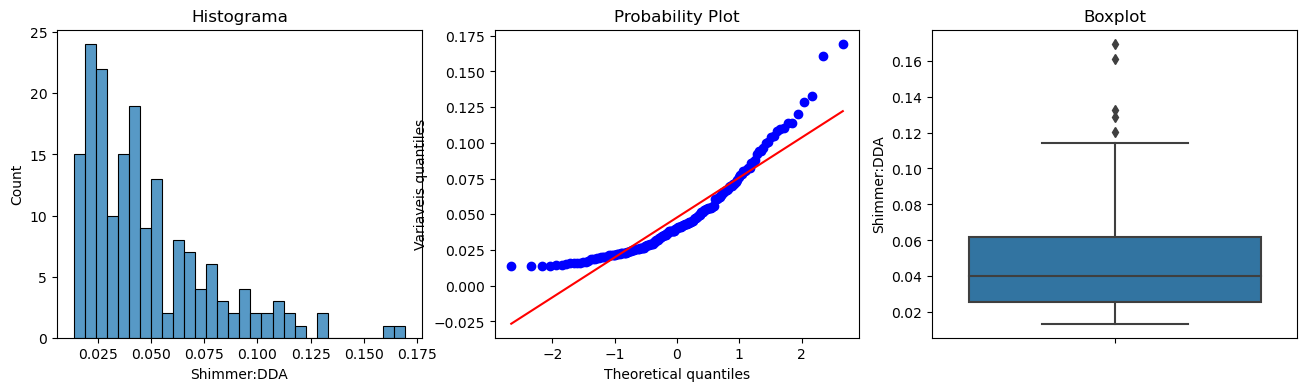

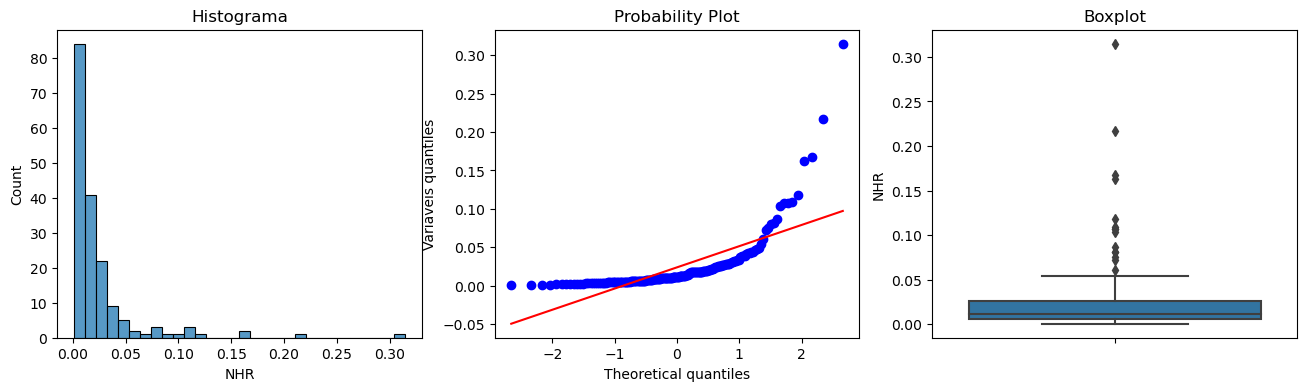

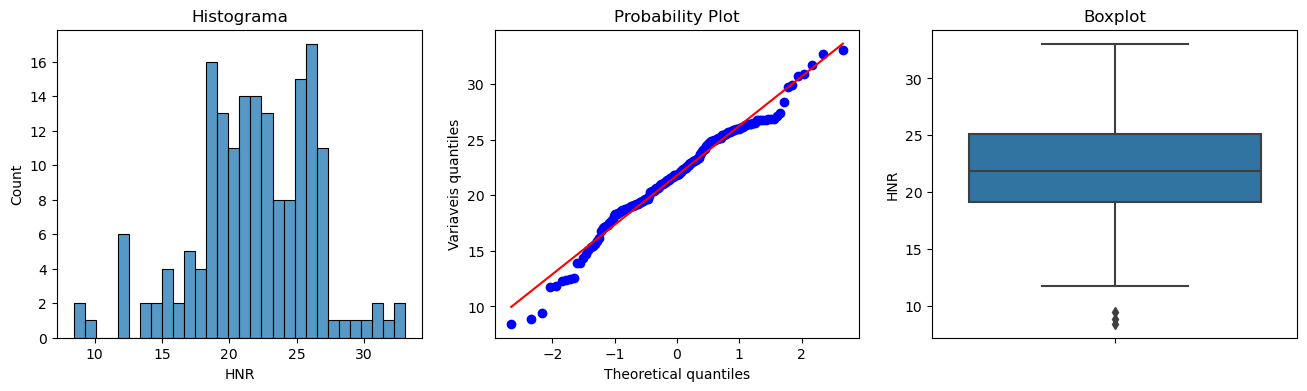

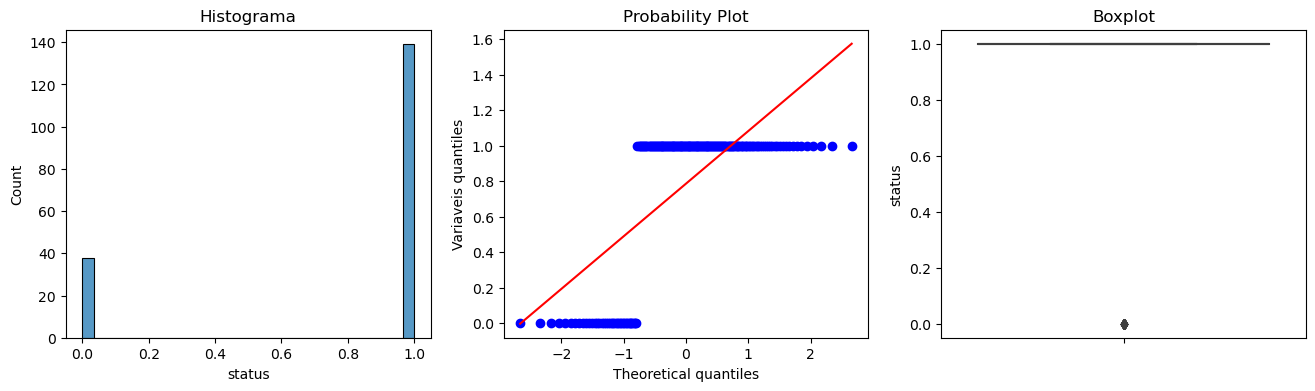

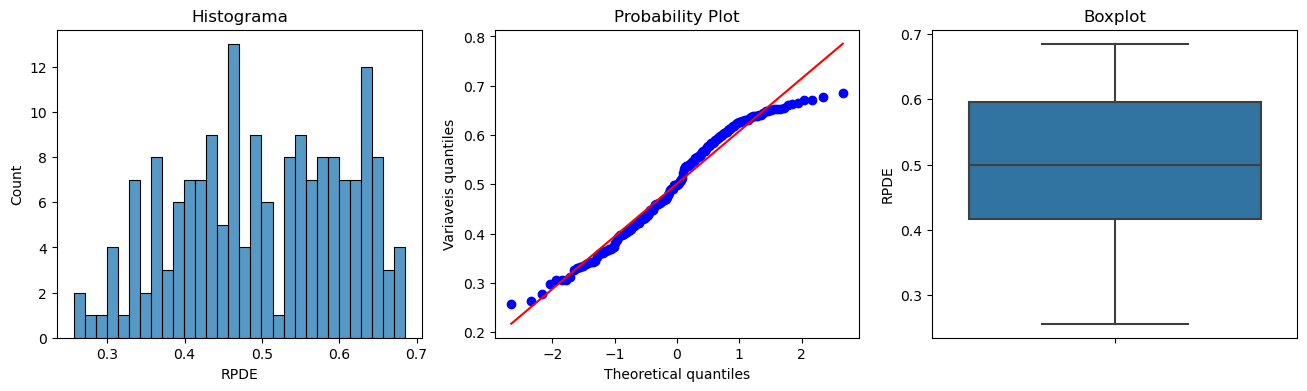

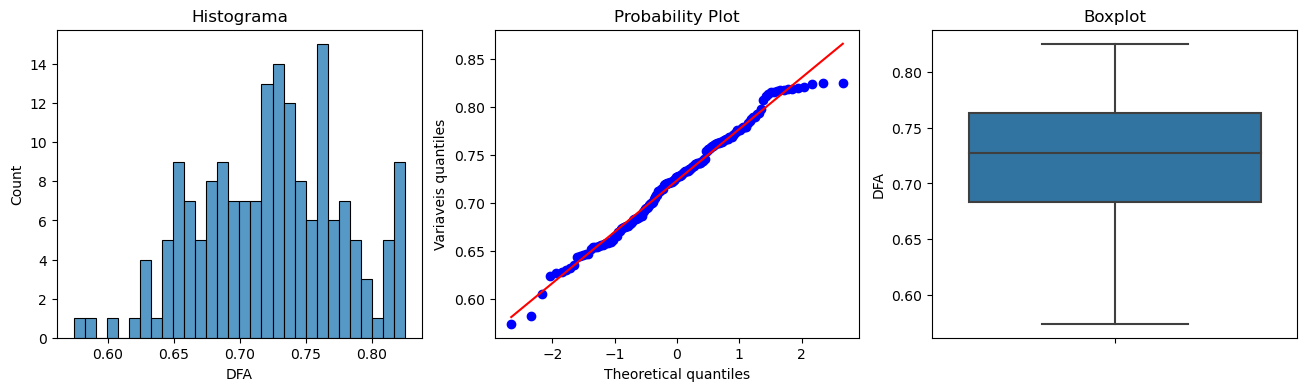

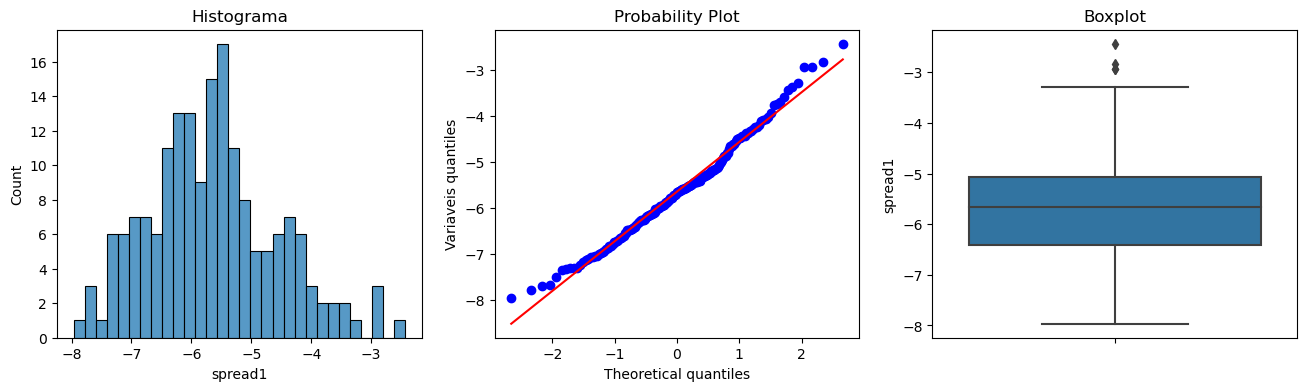

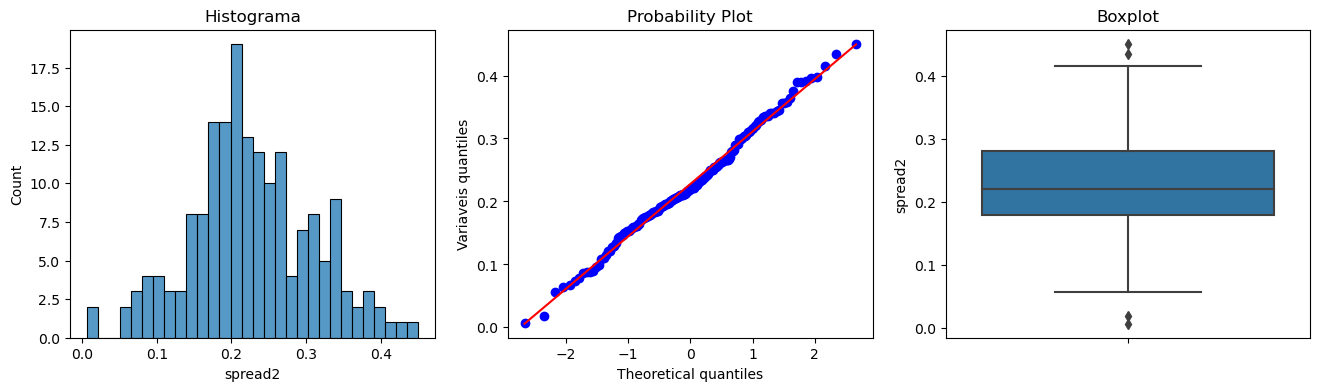

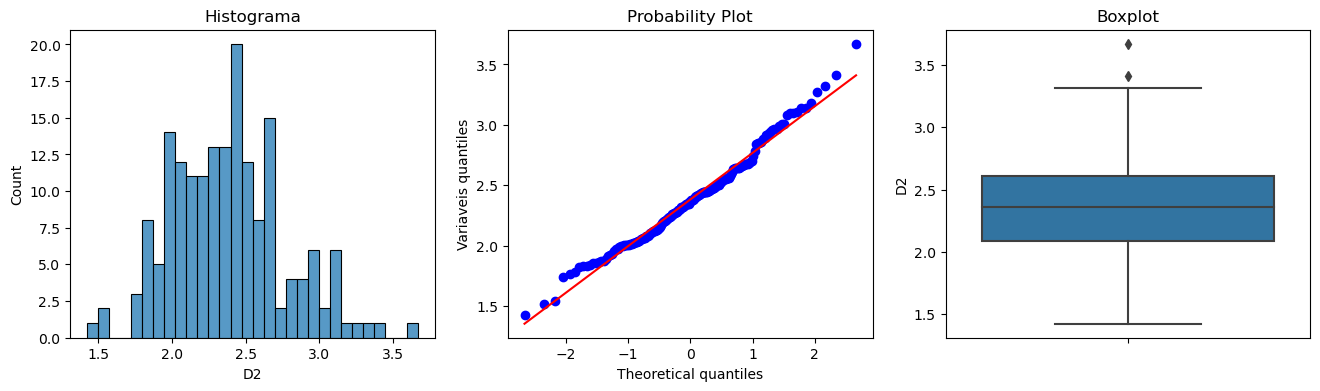

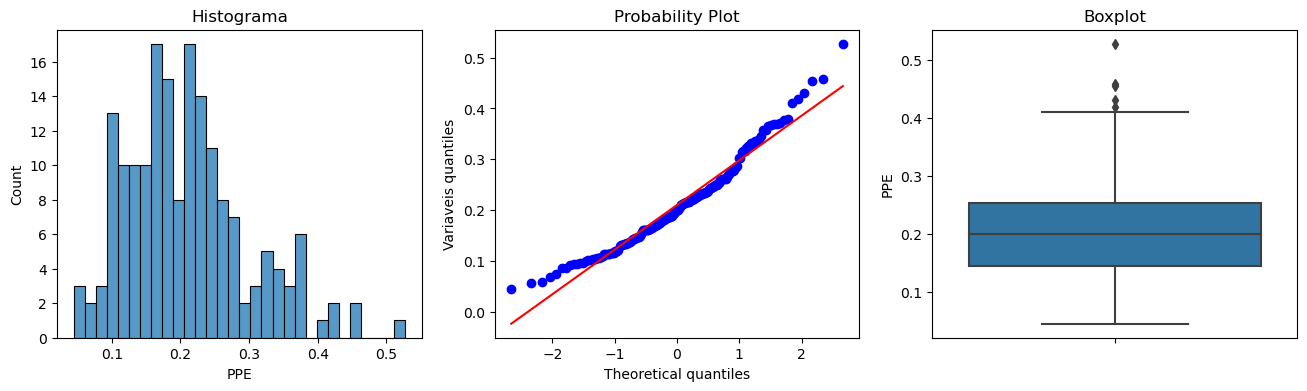

In [88]:
for x in numerico:
    diagnostico_plots(df, x)

In [89]:
def drop_outliers_multiple_columns(df, numeric_columns):
    for column in numeric_columns:
        drop_outliers(df, column)

In [90]:
numerico

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [91]:
numeric_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:RAP','NHR']  # Lista de nomes de colunas numéricas
drop_outliers_multiple_columns(df, numeric_columns)

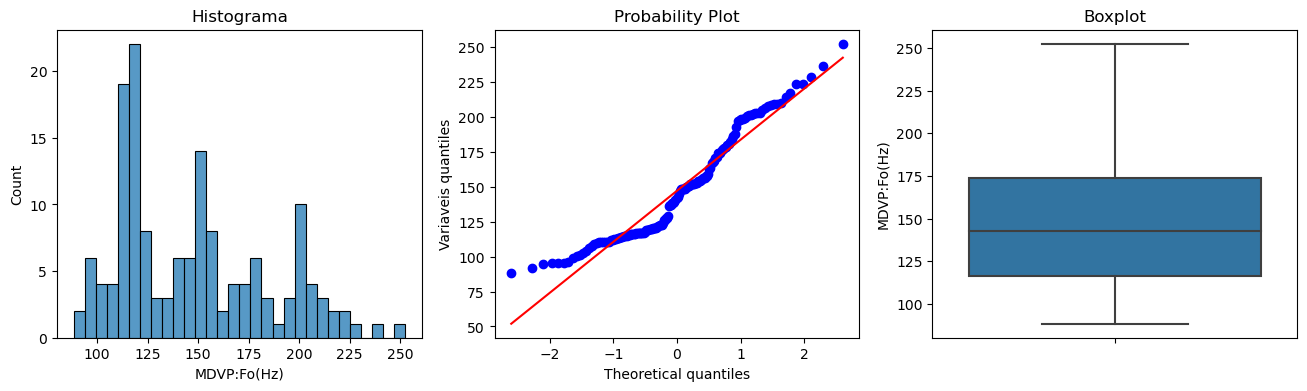

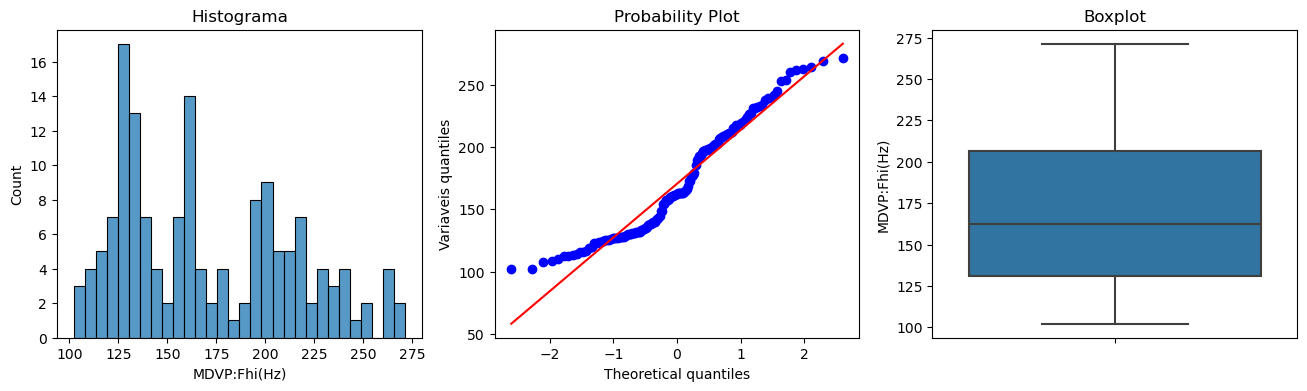

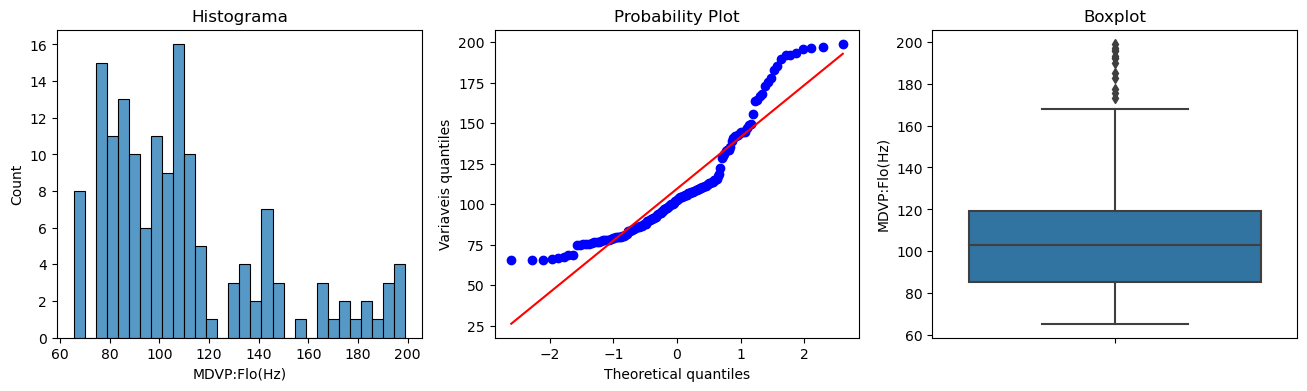

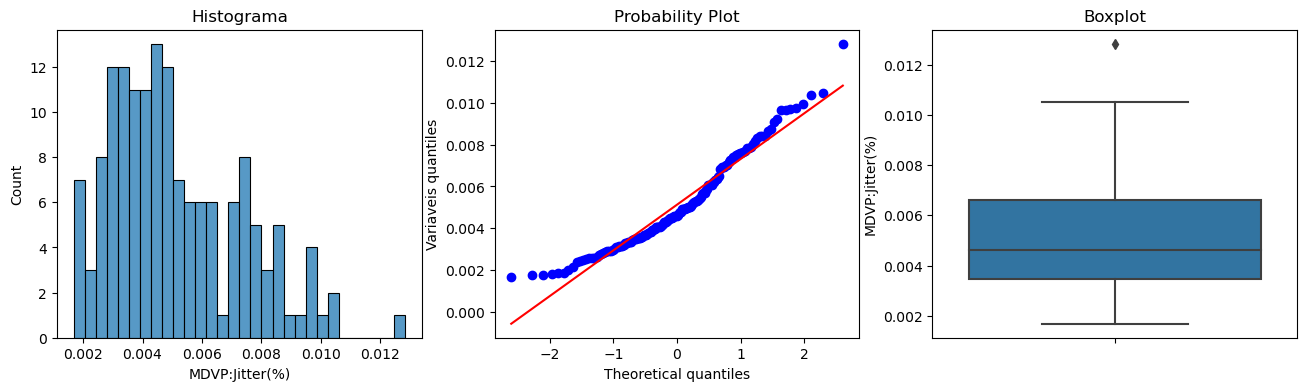

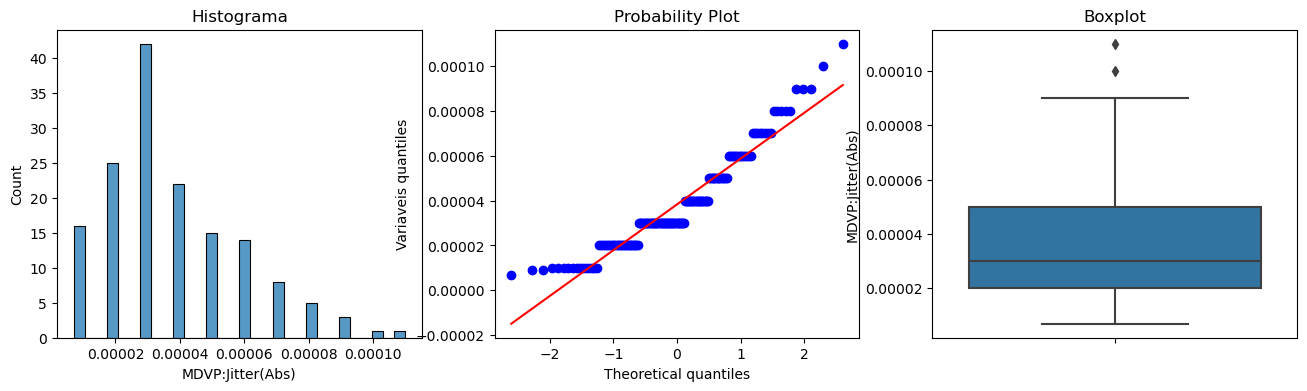

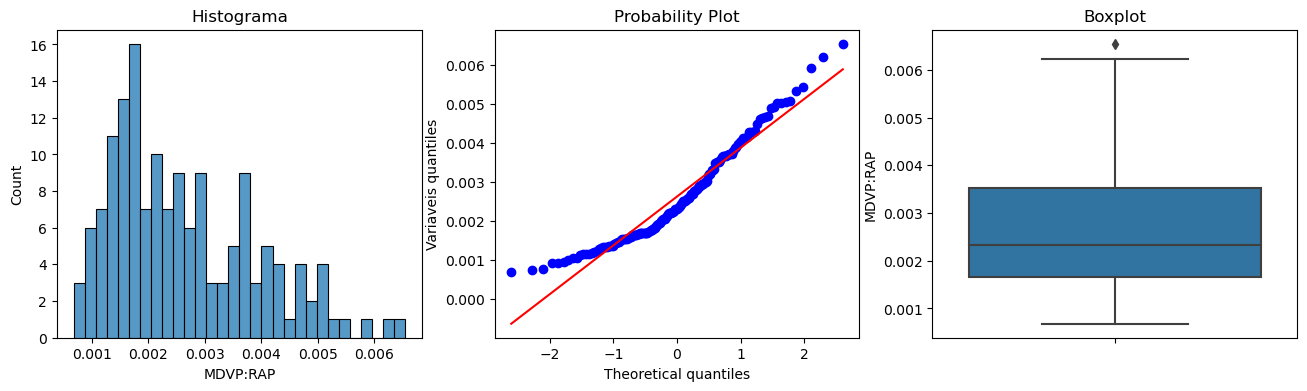

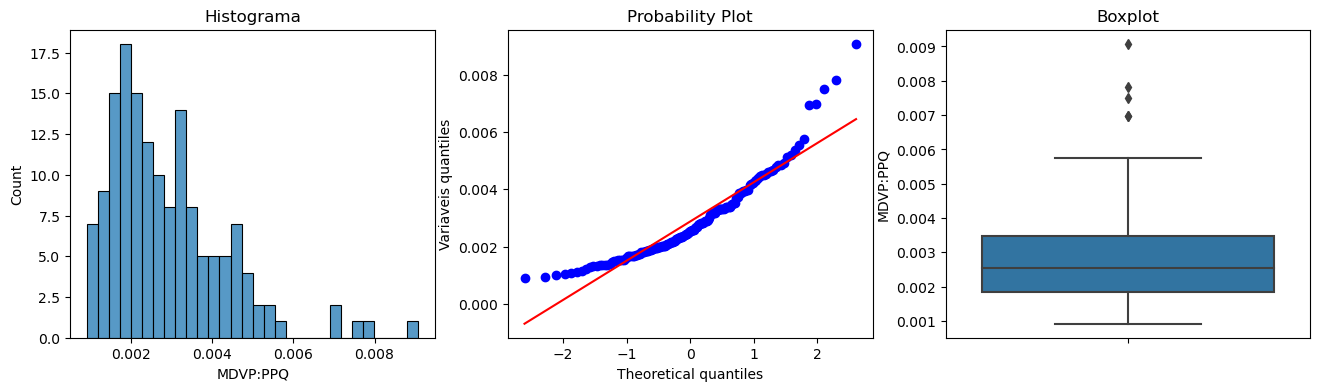

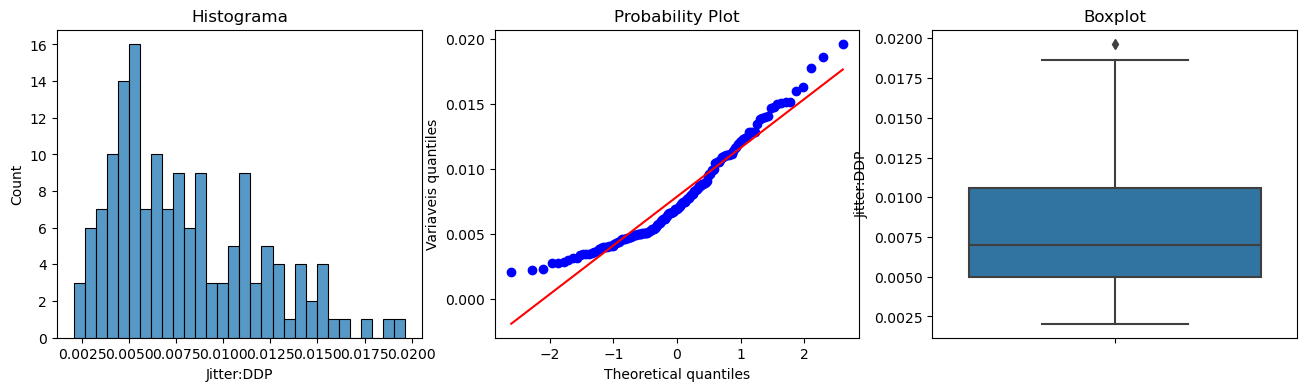

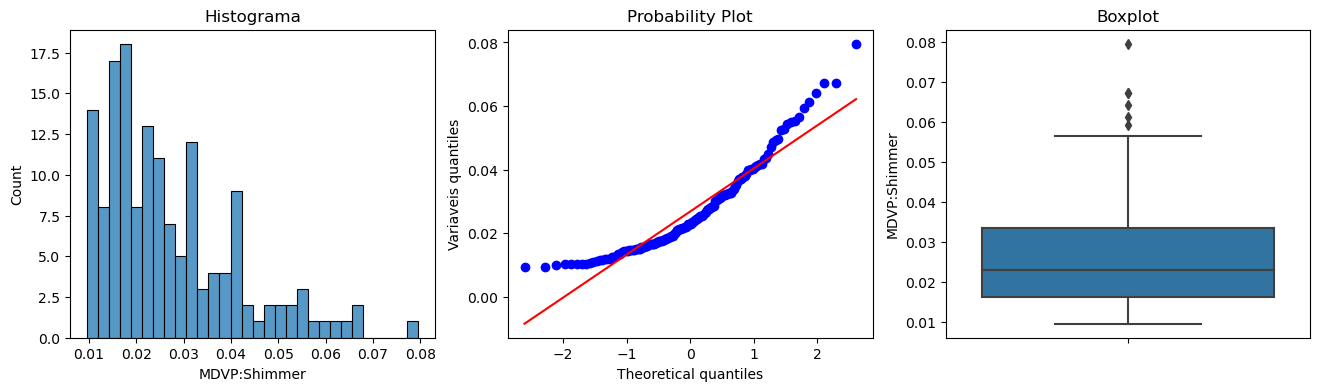

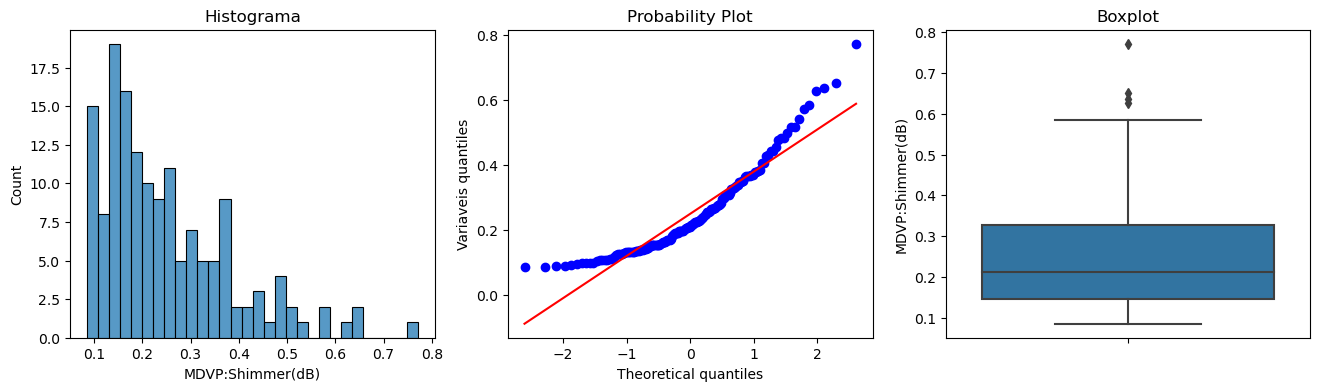

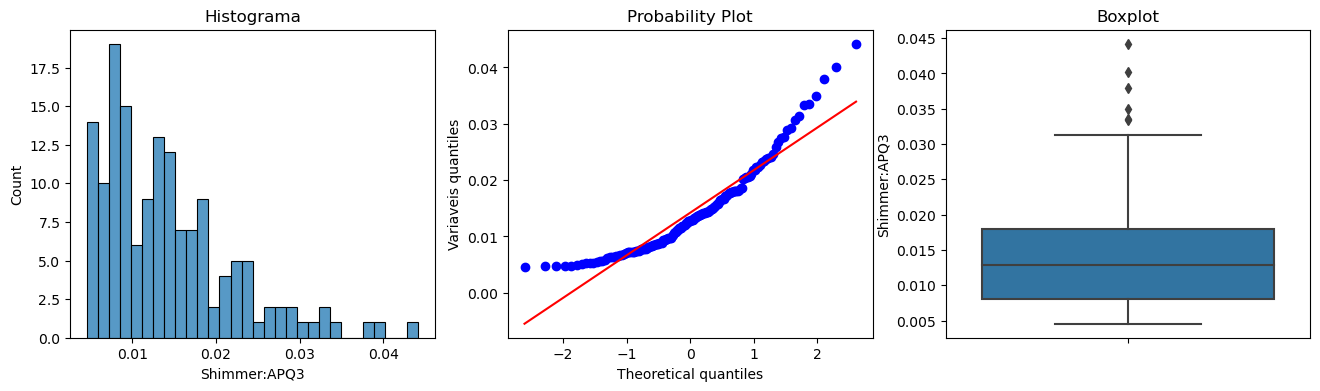

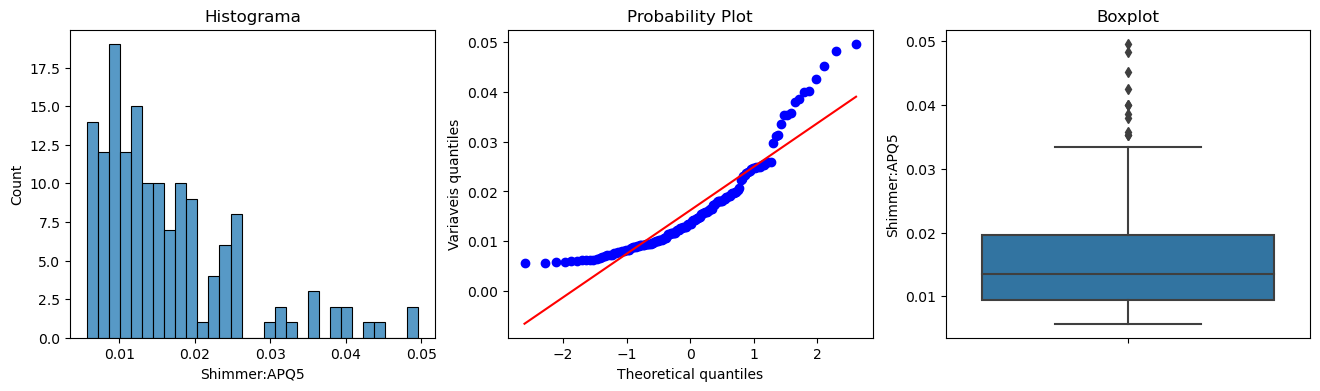

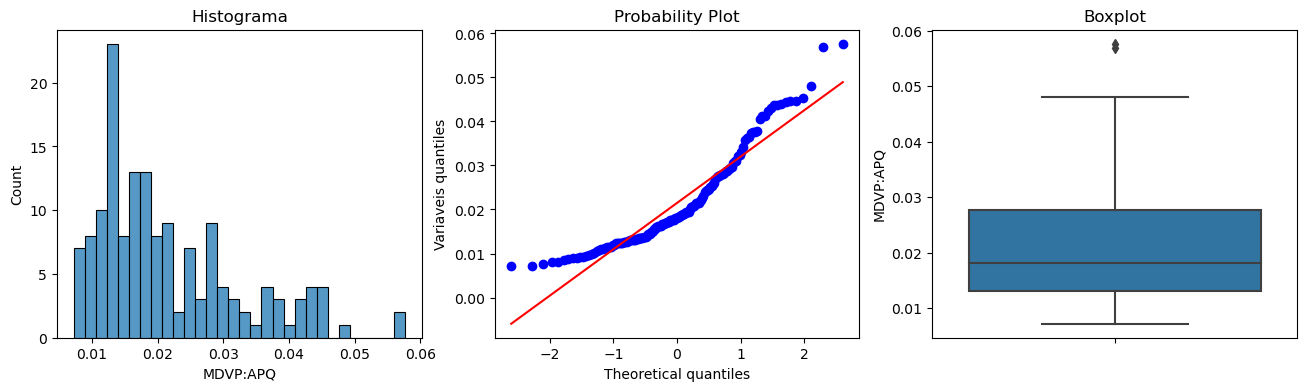

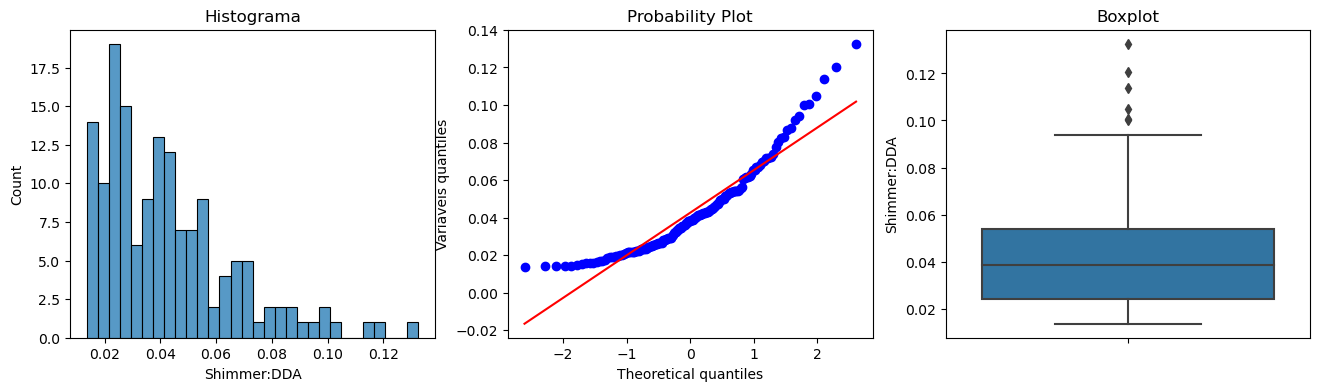

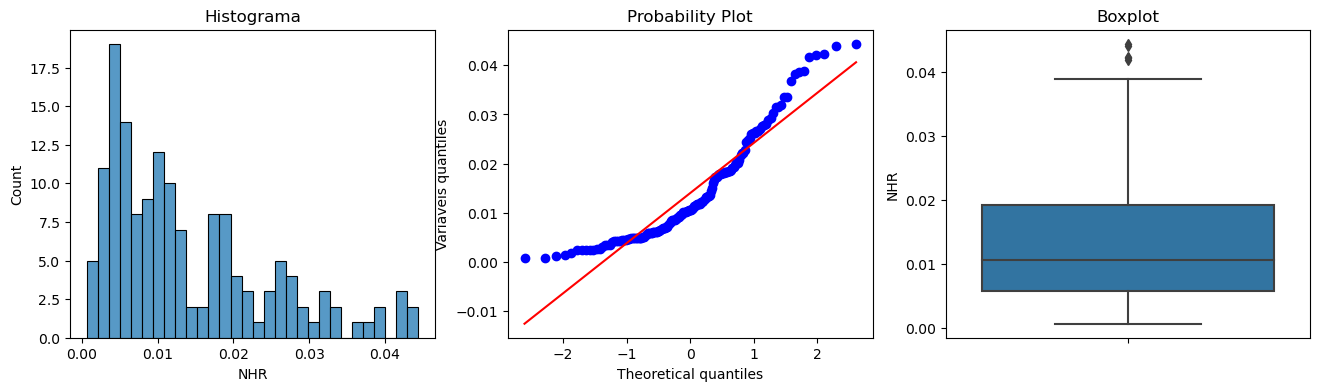

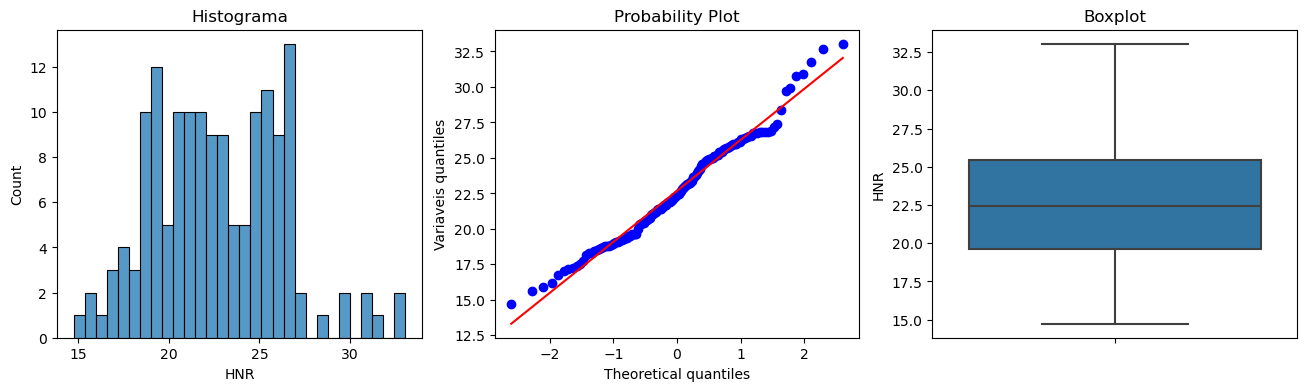

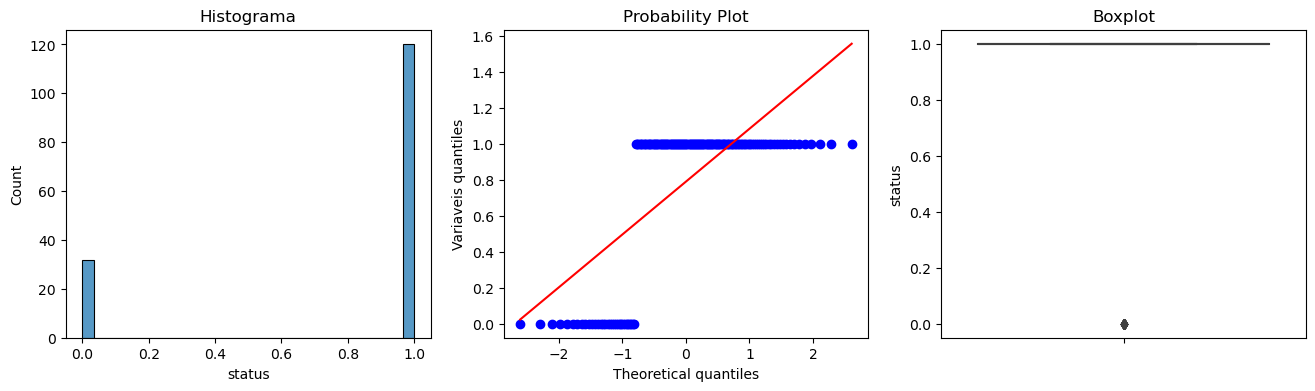

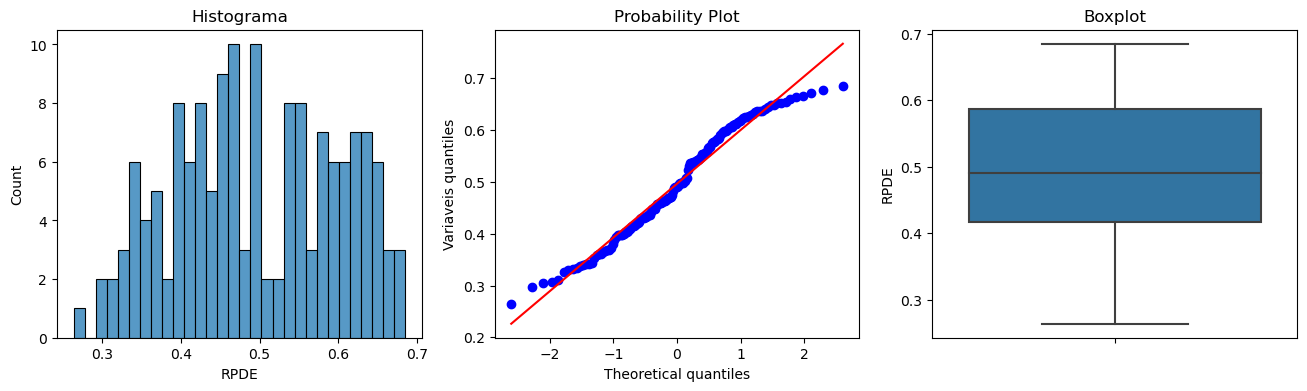

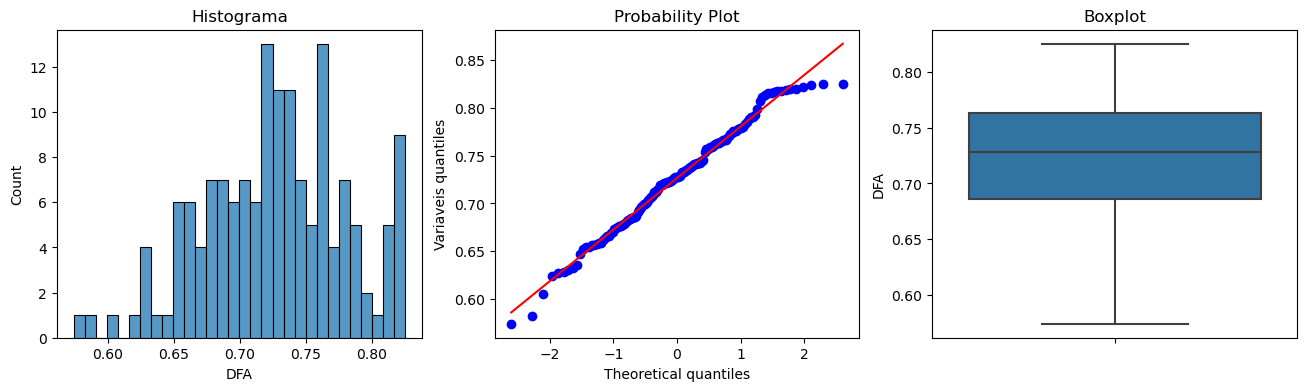

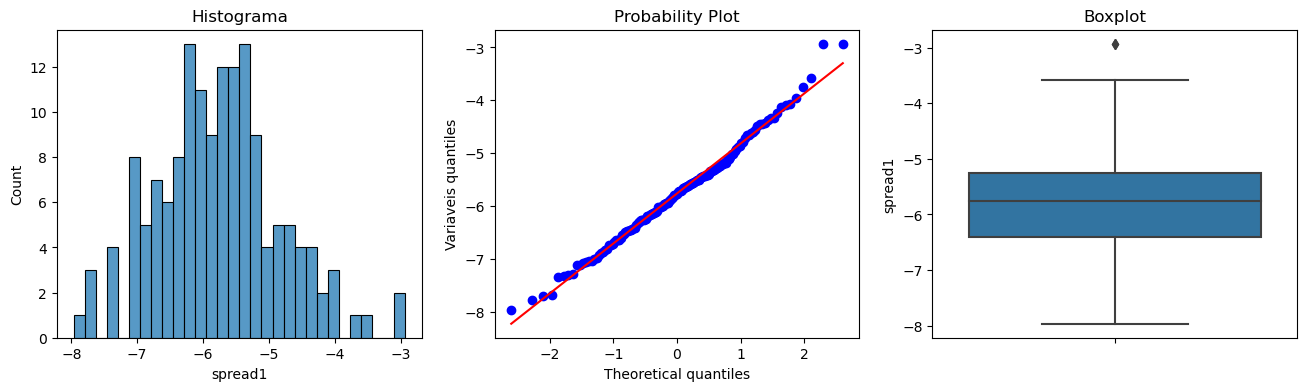

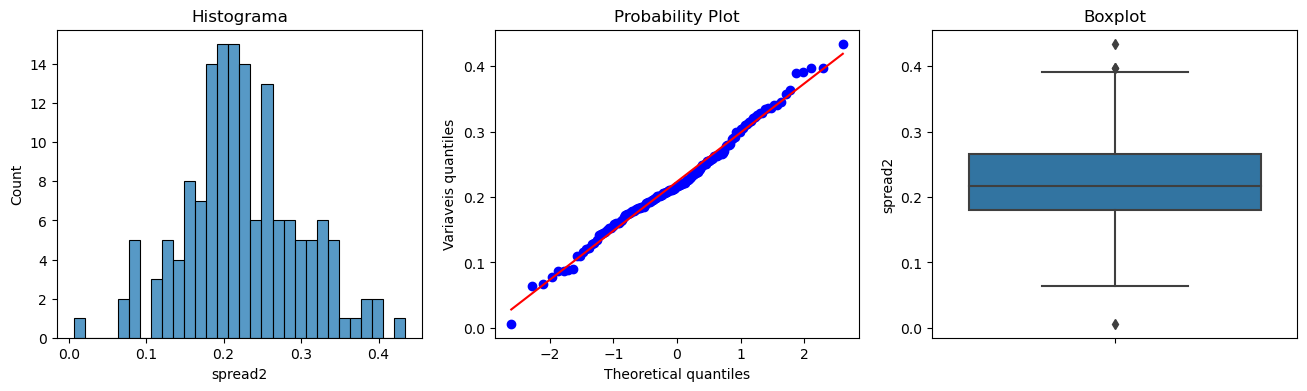

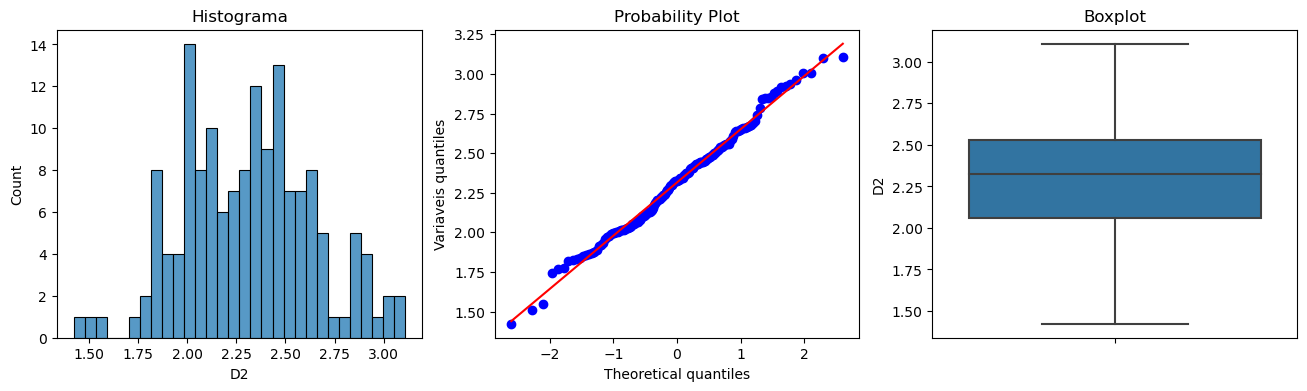

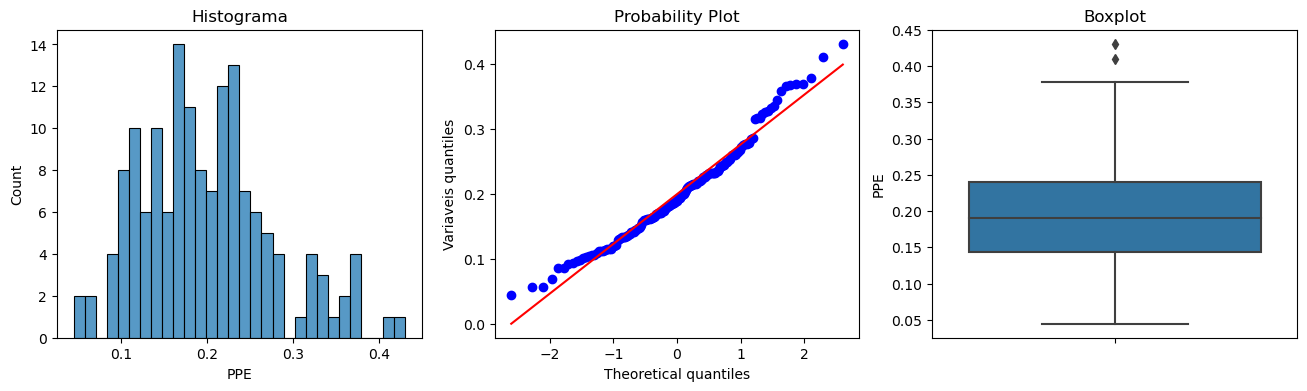

In [92]:
for x in numerico:
    diagnostico_plots(df, x)

In [93]:
# Drop das colunas 'name e status'

X = df.drop(columns=['name','status'], axis=1)
Y = df['status']

In [94]:
# dividir um conjunto de dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [102]:
# Modelo de Previsao - Suporte Vector Machine (SVM)
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracia dos dados de treinamento:',training_data_accuracy)

Accuracia dos dados de treinamento: 0.8099173553719008


In [103]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

print('Acuraçia dos dados de teste:',test_data_accuracy)

Acuraçia dos dados de teste: 0.9032258064516129


In [104]:
# implementando varios modelos pipeline 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

def plot_roc(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='auc=%.3f' % auc, color='#084081')
    plt.plot([0, 1], [0, 1], linestyle='--', color='k', scalex=False, scaley=False)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

def classificacao(X_train, X_test, y_train, y_test):    
    accuracy = 0.0
    best_pipeline = ''
    best_classificacao = 0
    
    pipeline_lr = Pipeline([('lr_Regression', LogisticRegression())])
    pipeline_dt = Pipeline([('Dt_classifier', DecisionTreeClassifier())])
    pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
    pipeline_xg = Pipeline([('XGB classifier', XGBClassifier())])
    
    pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_xg]
    
    pipe_dict = {0:'Logistic Regression:', 1:'Decision Tree Classifier', 2:'Random Forest Classifier', 3:'XGB Classifier'}
    
    for i, model in enumerate(pipelines):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'**************************{pipe_dict[i]}*******************************')
        [tp, fp], [fn, tn] = confusion_matrix(y_test, y_pred)
        print(pipe_dict[i])
        print('Precision: %.3f' % precision_score(y_test, y_pred))
        print('Recall: %.3f' % recall_score(y_test, y_pred))
        print('F1: %.3f' % f1_score(y_test, y_pred))
        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
        print('\n')
        plot_roc(model, X_test, y_test)
        
        if model.score(X_test, y_test) > accuracy:
            accuracy = model.score(X_test, y_test)
            best_pipeline = model
            best_classificacao = i

    print(f'\nO Modelo escolhido pela a acuracia: {pipe_dict[best_classificacao]}')


**************************Logistic Regression:*******************************
Logistic Regression:
Precision: 0.893
Recall: 0.962
F1: 0.926
Accuracy: 0.871




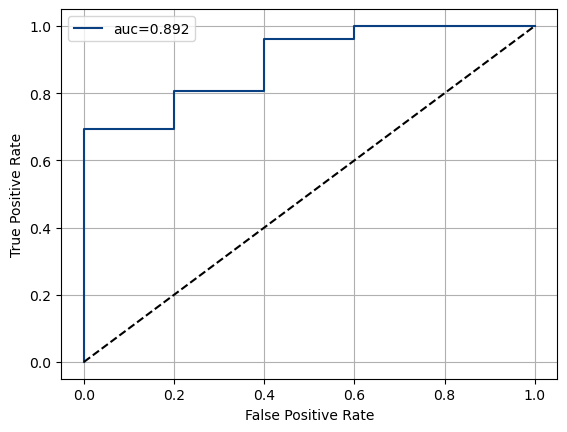

**************************Decision Tree Classifier*******************************
Decision Tree Classifier
Precision: 0.958
Recall: 0.885
F1: 0.920
Accuracy: 0.871




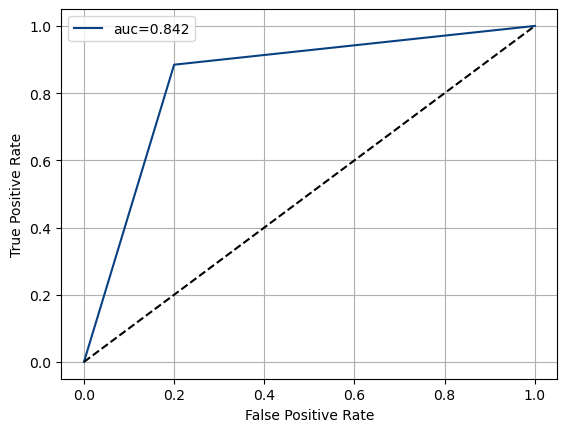

**************************Random Forest Classifier*******************************
Random Forest Classifier
Precision: 0.962
Recall: 0.962
F1: 0.962
Accuracy: 0.935




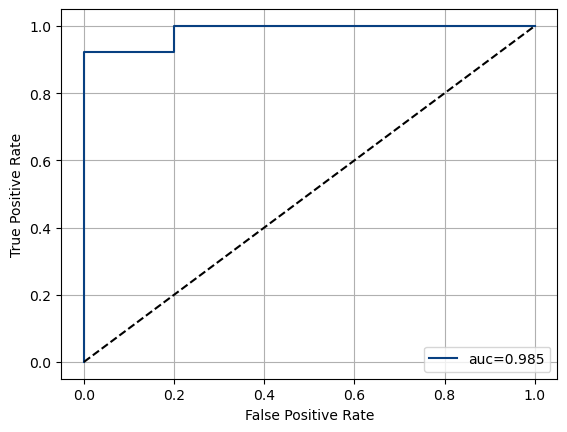

**************************XGB Classifier*******************************
XGB Classifier
Precision: 0.926
Recall: 0.962
F1: 0.943
Accuracy: 0.903




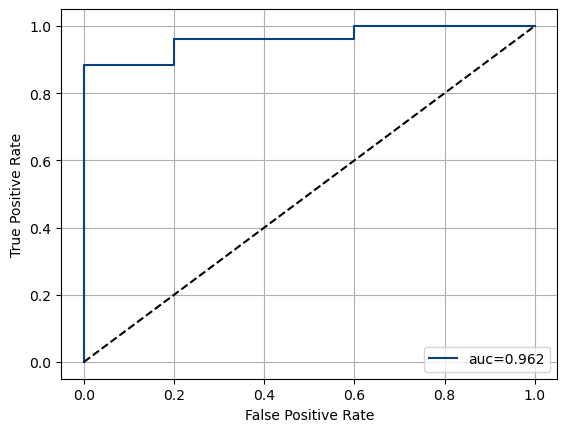


O Modelo escolhido pela a acuracia: Random Forest Classifier


In [105]:
classificacao(X_train, X_test, y_train, y_test)

In [117]:
model = RandomForestClassifier()

# training the SVM model with training data
model.fit(X_train, y_train)
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracia dos dados de treinamento:', training_data_accuracy)

Accuracia dos dados de treinamento: 1.0


In [115]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Acuraçia dos dados de teste:', test_data_accuracy)

Acuraçia dos dados de teste: 0.9354838709677419


In [118]:
def predict_parkinson(input_data, model):
    # Transformar os dados de entrada em um array numpy
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Redimensionar o array numpy para que tenha uma única linha
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # Realizar a previsão usando o modelo fornecido
    prediction = model.predict(input_data_reshaped)
    
    # Imprimir o resultado da previsão
    if prediction[0] == 0:
        print("A pessoa não tem doença de Parkinson")
    else:
        print("A pessoa tem Parkinson")

In [119]:
input_index = 10  # Exemplo de índice de linha
input_data = X.iloc[input_index, :].values

# Realizar a previsão usando a função `predict_parkinson` definida anteriormente
predict_parkinson(input_data, model)

A pessoa tem Parkinson


In [122]:
# Selecionar as 50 primeiras linhas para teste
input_data = X.iloc[:50, :].values

# Realizar a previsão para cada linha usando um loop
for i in range(50):
    predict_parkinson(input_data[i], model)

A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa não tem doença de Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa não tem doença de Parkinson
A pessoa não tem doença de Parkinson
A pessoa não tem doença de Parkinson
A pessoa não tem doença de Parkinson
A pessoa não tem doença de Parkinson
A pessoa não tem doença de Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pessoa tem Parkinson
A pes

In [124]:
# Salvando o modelo 
from joblib import dump

# Salvar o modelo treinado
dump(model, 'modelo_treinado.joblib')

['modelo_treinado.joblib']

In [126]:
# Importando o modelo

import pickle

with open('modelo_treinado.pkl', 'wb') as f:
    pickle.dump(model, f)

In [127]:
model

RandomForestClassifier()